In [1]:
# matplot作图中文无法渲染处理办法

import matplotlib
matplotlib.matplotlib_fname()
# '/Users/qinbo/miniconda3/envs/py37/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'
# 编辑上述文件找到找到
## 行: #font.family: sans-serif，去掉最前面的#
## 行: #font.sans-serif: ...,  去掉最前面的#, 并更改为 font.sans-serif: SimHei, ...
# 搜索下载SimHei.ttf 字体文件, 并复制到目录 ...mpl-data/fonts/ttf/SimHei.ttf
# 清字体缓存文件 .matplotlib/*.json
# 若在jupyter notebook环境中, 重启python kernel

'/Users/qinbo/miniconda3/envs/py37/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

回归分析举例:《Python数据挖掘与机器学习》第五章

【例5-1】分析预测房子的大小（平方英尺）和房价（美元）之间的对应关系。

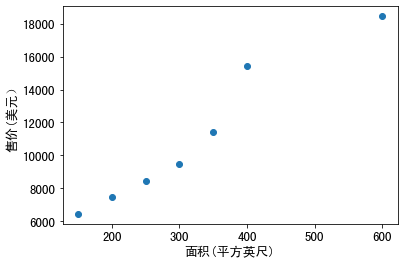

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
UseMacbook = True
# /Users/qinbo/miniconda3/envs/py37/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
# 下面三条命令应该可以让图形可以显示中文
if UseMacbook:
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] =False
else:
    from matplotlib.pylab import mpl
    mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.size']=13
y=[6450, 7450, 8450, 9450, 11450, 15450, 18450]
x=[150,200, 250,300, 350, 400, 600]
plt.scatter(x,y)
plt.xlabel('面积(平方英尺)')
plt.ylabel('售价(美元）')
plt.show()


对鸢尾花数据集中的'petal-length'和'petal-width'两列数据进行回归分析。

（1）导入包和数据


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris 
from sklearn.linear_model import LinearRegression
%matplotlib inline
iris = load_iris()   #导入数据集iris
data=pd.DataFrame(iris.data)
data.columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
data.head()   #显示前5行


,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


（2）对数据集中的'petal-length'和'petal-width'两列数据进行回归分析

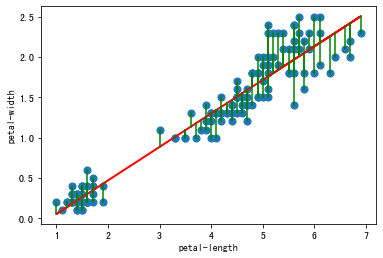

In [4]:
# 使用sklearn完成一元线性回归
x = data['petal-length'].values
y = data['petal-width'].values
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)
clf = LinearRegression()
clf.fit(x,y)
pre = clf.predict(x)
plt.scatter(x,y,s=50)
plt.plot(x,pre,'r-',linewidth=2)
plt.xlabel('petal-length')
plt.ylabel('petal-width')
for idx, m in enumerate(x):  
    plt.plot([m,m],[y[idx],pre[idx]], 'g-')  
plt.show()


（3）显示回归线的参数

In [5]:
print(u"系数", clf.coef_  )
print(u"截距", clf.intercept_  )
print(np.mean(y-pre)**2  )


系数 [[0.41575542]]
截距 [-0.36307552]
5.261263981765692e-33


（4）对花萼长度为3.9的花，预测其花萼宽度。

In [6]:
print(clf.predict([[3.9]]) )

[[1.2583706]]


多元线性回归模型的Python实现

（1）导入数据集

In [7]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.infty)
import warnings

warnings.filterwarnings('ignore')
np.set_printoptions(threshold=np.infty)
pd.options.display.float_format = '{:,.6f}'.format
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 获取数据
d=datasets.load_boston()
data=pd.DataFrame(d.data)
print("数据信息描述如下:")
print(data.info())
data['price']=d.target

print(data.sample(5))
x= data.values[:, :-1]
y= data.values[:, -1]
print(x[:10, :])
print(y[:10])


数据信息描述如下:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
None
           0        1         2        3        4        5         6        7        8          9        10         11        12     price
96  0.115040 0.000000  2.890000 0.000000 0.445000 6.163000 69.600000 3.495200 2.000000 276.000000 18.000000 391.830000 11.340000 21.400000
178 0

（2）多元线性回归建模

In [8]:
from sklearn.linear_model import LinearRegression   
#引入多元线性回归算法模块进行相应的训练
simple2=LinearRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=666)
simple2.fit(x_train,y_train)
print('多元线性回归模型系数：\n',simple2.coef_)
print('多元线性回归模型常数项：',simple2.intercept_)
y_predict=simple2.predict(x_test)


多元线性回归模型系数：
 [-7.18193450e-02  5.30929833e-02  8.89401987e-02  2.58828338e+00
 -1.68736702e+01  4.16057016e+00  1.12240087e-02 -1.39942513e+00
  3.12802694e-01 -1.48923405e-02 -9.90156198e-01  1.30697538e-02
 -5.27263444e-01]
多元线性回归模型常数项： 32.267237150461575


（3）模型分析

In [9]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score    
#直接调用库函数进行输出R2
print('预测值的均方误差：',
mean_squared_error(y_test,y_predict))
print(r2_score(y_test,y_predict))
print(simple2.score(x_test,y_test))
print('各特征间的系数矩阵：\n',simple2.coef_)            
print('影响房价的特征排序：\n',np.argsort(simple2.coef_))  
print('影响房价的特征排序：\n',
d.feature_names[np.argsort(simple2.coef_)])


预测值的均方误差： 24.995009571399805
0.6499762439230503
0.6499762439230503
各特征间的系数矩阵：
 [-7.18193450e-02  5.30929833e-02  8.89401987e-02  2.58828338e+00
 -1.68736702e+01  4.16057016e+00  1.12240087e-02 -1.39942513e+00
  3.12802694e-01 -1.48923405e-02 -9.90156198e-01  1.30697538e-02
 -5.27263444e-01]
影响房价的特征排序：
 [ 4  7 10 12  0  9  6 11  1  2  8  3  5]
影响房价的特征排序：
 ['NOX' 'DIS' 'PTRATIO' 'LSTAT' 'CRIM' 'TAX' 'AGE' 'B' 'ZN' 'INDUS' 'RAD'
 'CHAS' 'RM']


逻辑回归

Logistic回归Python实现

（1）导入相关包，打开数据


In [10]:
from sklearn.datasets import load_iris
X = load_iris().data
y = load_iris().target
print('前8条数据:\n',X[:8])
print('前8条数据对应的类型：',y[:8])


前8条数据:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]]
前8条数据对应的类型： [0 0 0 0 0 0 0 0]


（2）划分训练集和测试集并进行归一化

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train[:5])


[[ 0.01543995 -0.11925475  0.22512685  0.35579762]
 [-0.09984503 -1.04039491  0.11355956 -0.02984109]
 [ 1.05300481 -0.11925475  0.95031423  1.12707506]
 [-1.36797986  0.34131533 -1.39259884 -1.31530348]
 [ 1.1682898   0.11103029  0.72717965  1.38416753]]


（3）训练逻辑回归模型并对测试集进行预测

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#用LogisticRegression自带的score获得模型在测试集上的准确性
print('Accuracy of LR Classifier:%.3f'%classifier.score(X_test,y_test))


Accuracy of LR Classifier:0.974


多项式回归Python实现

（1）准备数据


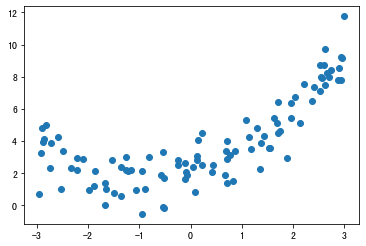

In [13]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.uniform(-3,3, size=100) # 产生100个随机数
X = x.reshape(-1,1) #将x变成矩阵，1行1列的形式
y = 0.5 * x**2 +x +2 + np.random.normal(0,1,size=100) 
#数据中引入噪声
plt.scatter(x,y)
plt.show()


（2）线性回归

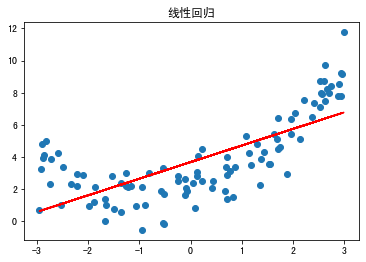

In [14]:
from sklearn.linear_model import LinearRegression
#线性回归
lin_reg = LinearRegression()
lin_reg.fit(X,y)
y_predict = lin_reg.predict(X)
plt.rcParams['font.family']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.title('线性回归')
plt.scatter(x,y)
plt.plot(x,y_predict,color='r')
plt.show()


（3）多项式回归

Text(0.5, 1.0, '多项式回归')

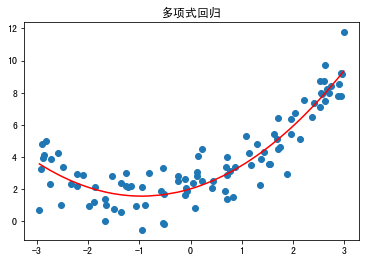

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2) 
#设置最多添加几次幂的特征项
poly.fit(X)
x2 = poly.transform(X)
from sklearn.linear_model import LinearRegression
#接下来的代码和线性回归一致
lin_reg2 = LinearRegression()
lin_reg2.fit(x2,y)
y_predict2 = lin_reg2.predict(x2)
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')
plt.title('多项式回归')


岭回归的Python实现

系数矩阵: [1.59032686]
线性回归模型:
 RidgeCV(alphas=array([ 0.1,  1. , 10. ]))


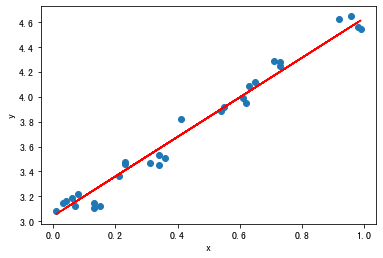

In [16]:
import numpy as np 
import matplotlib.pyplot as plt  
from sklearn.linear_model import Ridge,RidgeCV   
# Ridge岭回归，RidgeCV带有广义交叉验证的岭回归
data=[
    [0.07,3.12],[0.41,3.82],[0.99,4.55],[0.73,4.25],[0.98,4.56],
    [0.55,3.92],[0.34,3.53],[0.03,3.15],[0.13,3.11],[0.13,3.15],
    [0.31,3.47],[0.65,4.12],[0.73,4.28],[0.23,3.48],[0.96,4.65],
    [0.62,3.95],[0.36,3.51],[0.15,3.12],[0.63,4.09],[0.23,3.46],
    [0.08,3.22],[0.06,3.19],[0.92,4.63],[0.71,4.29],[0.01,3.08],
    [0.34,3.45],[0.04,3.16],[0.21,3.36],[0.61,3.99],[0.54,3.89] ]
#生成X和y矩阵
dataMat = np.array(data)
X = dataMat[:,0:1]   # 变量x
y = dataMat[:,1]   #变量y
# 岭回归
model = Ridge(alpha=0.5)
model = RidgeCV(alphas=[0.1, 1.0, 10.0])  
# RidgeCV可以设置多个参数，算法使用交叉验证获取最佳参数值
model.fit(X, y)   # 线性回归建模
print('系数矩阵:',model.coef_)
print('线性回归模型:\n',model)
# print('交叉验证最佳alpha值',model.alpha_)  
# 只有在使用RidgeCV算法时才有效
# 使用模型预测
predicted = model.predict(X)
# 绘制散点图 参数：x横轴 y纵轴
plt.scatter(X, y, marker='o')
plt.plot(X, predicted,c='r')
# 绘制x轴和y轴坐标
plt.xlabel('x')
plt.ylabel('y')
# 显示图形
plt.show()


Lasso回归Python实现

r^2 on test data : 0.518282


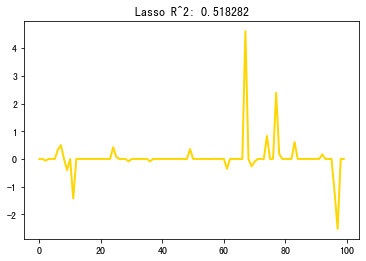

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
#def main():
# 产生一些稀疏数据
np.random.seed(42)
n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features) 
# randn(...)产生的是正态分布的数据
coef = 3 * np.random.randn(n_features)
# 每个特征对应一个系数
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0 
# 稀疏化系数--随机地把系数向量1x200的其中10个值变为0
y = np.dot(X, coef) 
# 添加噪声：零均值，标准差为 0.01 的高斯噪声
y += 0.01 * np.random.normal(size=n_samples)
# 把数据划分成训练集和测试集
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]
# 训练 Lasso 模型
from sklearn.linear_model import Lasso
alpha = 0.1
lasso = Lasso(alpha=alpha)
y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print("r^2 on test data : %f" % r2_score_lasso)
plt.plot(lasso.coef_, color='gold', linewidth=2,label='Lasso coefficients')
plt.title("Lasso R^2: %f" % r2_score_lasso)
plt.show()
